EXERCICI 1 
S'ha realitzar una web scraping de dues pagines webs proposades: http://quotes.toscrape.com y www.wikipedia.es.   Primer per BeautifulSoap y despres per Selenium

#Beautiful scraping de http://quotes.toscrape.com. Se trata de una pagina web con citas sobre la vida. Cada cita está etiquetada (tags) con palabras clave del contenido. A la derecha de la pagina vemos las palabras que mas etiquetas tienen. 

In [10]:
import requests
from bs4 import BeautifulSoup
import requests
import json

In [2]:

URL="https://quotes.toscrape.com/"
page=requests.get (URL)
soup= BeautifulSoup(page.content)
print(soup.prettify())           

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

He fet tres probes per veure si funcionava bé la busqueda

In [3]:
#obting el titol de la pagina
title=soup.title
print(title)

<title>Quotes to Scrape</title>


In [4]:
soup.find_all('a')      #obtengo todos los links

[<a href="/" style="text-decoration: none">Quotes to Scrape</a>,
 <a href="/login">Login</a>,
 <a href="/author/Albert-Einstein">(about)</a>,
 <a class="tag" href="/tag/change/page/1/">change</a>,
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>,
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>,
 <a class="tag" href="/tag/world/page/1/">world</a>,
 <a href="/author/J-K-Rowling">(about)</a>,
 <a class="tag" href="/tag/abilities/page/1/">abilities</a>,
 <a class="tag" href="/tag/choices/page/1/">choices</a>,
 <a href="/author/Albert-Einstein">(about)</a>,
 <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>,
 <a class="tag" href="/tag/life/page/1/">life</a>,
 <a class="tag" href="/tag/live/page/1/">live</a>,
 <a class="tag" href="/tag/miracle/page/1/">miracle</a>,
 <a class="tag" href="/tag/miracles/page/1/">miracles</a>,
 <a href="/author/Jane-Austen">(about)</a>,
 <a class="tag" href="/tag/aliteracy/page/1/">aliteracy</a>,
 <a class="tag" href

In [5]:
all_links= soup.find_all('a')  #elementos q crean vinculos con una url de destino del enlace
for link in all_links:
    print(link.get('href'))

/
/login
/author/Albert-Einstein
/tag/change/page/1/
/tag/deep-thoughts/page/1/
/tag/thinking/page/1/
/tag/world/page/1/
/author/J-K-Rowling
/tag/abilities/page/1/
/tag/choices/page/1/
/author/Albert-Einstein
/tag/inspirational/page/1/
/tag/life/page/1/
/tag/live/page/1/
/tag/miracle/page/1/
/tag/miracles/page/1/
/author/Jane-Austen
/tag/aliteracy/page/1/
/tag/books/page/1/
/tag/classic/page/1/
/tag/humor/page/1/
/author/Marilyn-Monroe
/tag/be-yourself/page/1/
/tag/inspirational/page/1/
/author/Albert-Einstein
/tag/adulthood/page/1/
/tag/success/page/1/
/tag/value/page/1/
/author/Andre-Gide
/tag/life/page/1/
/tag/love/page/1/
/author/Thomas-A-Edison
/tag/edison/page/1/
/tag/failure/page/1/
/tag/inspirational/page/1/
/tag/paraphrased/page/1/
/author/Eleanor-Roosevelt
/tag/misattributed-eleanor-roosevelt/page/1/
/author/Steve-Martin
/tag/humor/page/1/
/tag/obvious/page/1/
/tag/simile/page/1/
/page/2/
/tag/love/
/tag/inspirational/
/tag/life/
/tag/humor/
/tag/books/
/tag/reading/
/tag/fri

#Quiero obtener todos los tags de la pagina web

In [6]:
#inicialmente sólo he obtenido los tags de la primera pagina

keywords_meta_tags = soup.select('div.tags meta.keywords')
for keywords_meta in keywords_meta_tags:
    keywords_content = keywords_meta.get('content')
    print(keywords_content)


change,deep-thoughts,thinking,world
abilities,choices
inspirational,life,live,miracle,miracles
aliteracy,books,classic,humor
be-yourself,inspirational
adulthood,success,value
life,love
edison,failure,inspirational,paraphrased
misattributed-eleanor-roosevelt
humor,obvious,simile


#Cambio el código para que vaya por todas las paginas de la web obteniendo los tags

In [7]:
URL = "https://quotes.toscrape.com/"
page_number = 1

while True:
    url = f"{URL}page/{page_number}/"

    response = requests.get(url)  # Realizar la solicitud HTTP y obtener el contenido de la página

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Buscar todas las etiquetas meta con la clase 'keywords'
        keywords_meta_tags = soup.find_all('meta', {'class': 'keywords'})

        # Iterar sobre todas las etiquetas meta y extraer el contenido
        for keywords_meta in keywords_meta_tags:
            keywords_content = keywords_meta.get('content')
            print(keywords_content)

        next_page = soup.select_one('li.next a')
        if next_page:
            page_number += 1
        else:
            break  # Salir del bucle while si no hay más páginas
    else:
        print(f"Error al obtener la página {url}")
        break  # Salir del bucle while en caso de error

change,deep-thoughts,thinking,world
abilities,choices
inspirational,life,live,miracle,miracles
aliteracy,books,classic,humor
be-yourself,inspirational
adulthood,success,value
life,love
edison,failure,inspirational,paraphrased
misattributed-eleanor-roosevelt
humor,obvious,simile
friends,heartbreak,inspirational,life,love,sisters
courage,friends
simplicity,understand
love
fantasy
life,navigation
activism,apathy,hate,indifference,inspirational,love,opposite,philosophy
friendship,lack-of-friendship,lack-of-love,love,marriage,unhappy-marriage
books,contentment,friends,friendship,life
fate,life,misattributed-john-lennon,planning,plans
love,poetry
happiness
attributed-no-source
humor,religion
humor
comedy,life,yourself
children,fairy-tales

imagination
music
learning,reading,seuss
dumbledore
friendship
misattributed-to-mother-teresa,paraphrased
death,inspirational
chocolate,food,humor
misattributed-to-c-s-lewis,reading
knowledge,learning,understanding,wisdom
books,library
inspirational
read,r

Para poder saber que palabras salen com mas frecuencia en los comentarios de la web que scrapeamos, busco la frecuencia en que aparecen los tags.

In [8]:
#busco las frecuencias de los tags
page_number = 1


tag_frequencies = {}   # Diccionario para almacenar las frecuencias de los tags
    

while True:
    url = f"{URL}page/{page_number}/"

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Buscar todas las etiquetas meta con la clase 'keywords'
        keywords_meta_tags = soup.find_all('meta', {'class': 'keywords'})

        # Iterar sobre todas las etiquetas meta y actualizar el diccionario de frecuencias
        for keywords_meta in keywords_meta_tags:
            keywords_content = keywords_meta.get('content').split(',')
            for tag in keywords_content:
                tag = tag.strip()
                tag_frequencies[tag] = tag_frequencies.get(tag, 0) + 1

        next_page = soup.select_one('li.next a')
        if next_page:
            page_number += 1
        else:
            break  # Salir del bucle while si no hay más páginas
    else:
        print(f"Error al obtener la página {url}")
        break  # Salir del bucle while en caso de error

# Imprimir las frecuencias de los tags
for tag, frequency in tag_frequencies.items():
    print(f"{tag}: {frequency}")

change: 1
deep-thoughts: 1
thinking: 2
world: 1
abilities: 1
choices: 1
inspirational: 13
life: 13
live: 1
miracle: 1
miracles: 1
aliteracy: 1
books: 11
classic: 2
humor: 12
be-yourself: 1
adulthood: 1
success: 1
value: 1
love: 14
edison: 1
failure: 1
paraphrased: 2
misattributed-eleanor-roosevelt: 1
obvious: 1
simile: 3
friends: 4
heartbreak: 1
sisters: 1
courage: 2
simplicity: 1
understand: 1
fantasy: 1
navigation: 1
activism: 1
apathy: 1
hate: 1
indifference: 1
opposite: 1
philosophy: 2
friendship: 5
lack-of-friendship: 1
lack-of-love: 1
marriage: 1
unhappy-marriage: 1
contentment: 1
fate: 1
misattributed-john-lennon: 1
planning: 1
plans: 1
poetry: 1
happiness: 1
attributed-no-source: 3
religion: 2
comedy: 1
yourself: 2
children: 2
fairy-tales: 1
: 3
imagination: 1
music: 2
learning: 2
reading: 7
seuss: 1
dumbledore: 2
misattributed-to-mother-teresa: 1
death: 3
chocolate: 1
food: 1
misattributed-to-c-s-lewis: 1
knowledge: 1
understanding: 1
wisdom: 1
library: 2
read: 1
readers: 1
re

Para tener una idea mas clara de las palabras que más han aparecido en la pagina web hago un gráfico de nube de palabras

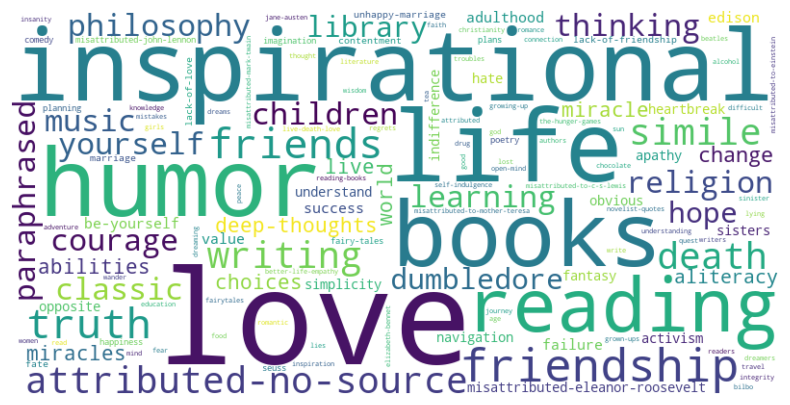

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_frequencies)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Podemos ver que las etiquetas mas usadas en los comentarios de la web son Love, humor, inspiration, life, books, reading, etc.

#Scraper with Selenium

#Voy a hacer el mismo ejercicio scrapeando con Selenium. Primero importo Selenium. He instalado el webdriver para Firefox para obtener la URL especifica y automatizar la busqueda del contenido de la web.

In [12]:
import selenium
from selenium import webdriver
import os

In [13]:
os.environ['PATH'] += r"C:/SeleniumDrivers"
driver=webdriver.Firefox()
driver.get('https://quotes.toscrape.com/')

#he hecho alguna prueba para ver que realmente funcionaba selenium

In [4]:
title=driver.title
title

'Quotes to Scrape'

In [5]:
print(driver.page_source)

<html lang="en"><head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itemprop="author">Al

#Inicialmente he encontrado los tags de la primera cita que aparece en la web

In [6]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

try:
    meta_element=driver.find_element(By.CSS_SELECTOR, 'div.row div.col-md-8 div.quote div.tags meta[itemprop="keywords"]')
    content_value = meta_element.get_attribute('content')
    print(f'Contenido del atributo "content": {content_value}')
except NoSuchElementException:
    print('Elemento no encontrado')
finally:
    driver.quit()

Contenido del atributo "content": change,deep-thoughts,thinking,world


#Busco los tags de la web. Como tarda mucho en recolectarlos todos, lo he limitado a 300 paginas.

In [14]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

driver = webdriver.Firefox()    # Inicializar el navegador


base_url = 'https://quotes.toscrape.com/page/'

page_number = 1     #inicio la pagina con 1

max_pages=300       #limito a 300 paginas

while page_number <= max_pages:
    
    url = f'{base_url}{page_number}/'   # Construiyo la URL de la página actual

    driver.get(url)     #va buscando por la URL

    try:
        # Encontrar todos los elementos en la página actual
        meta_elements = driver.find_elements(By.CSS_SELECTOR, 'div.row div.col-md-8 div.quote div.tags meta[itemprop="keywords"]')

        # Imprimir el contenido de cada elemento
        for meta_element in meta_elements:
            content_value = meta_element.get_attribute('content')
            print(f'content:{content_value}')

    except NoSuchElementException:
        print(f'Elementos no encontrados en la página {page_number}')
        break  # para salir del bucle si no hay mas paginas

    page_number += 1    #Pasar a la siguiente pagina


driver.quit()       #cierro el navegador

content:change,deep-thoughts,thinking,world
content:abilities,choices
content:inspirational,life,live,miracle,miracles
content:aliteracy,books,classic,humor
content:be-yourself,inspirational
content:adulthood,success,value
content:life,love
content:edison,failure,inspirational,paraphrased
content:misattributed-eleanor-roosevelt
content:humor,obvious,simile
content:friends,heartbreak,inspirational,life,love,sisters
content:courage,friends
content:simplicity,understand
content:love
content:fantasy
content:life,navigation
content:activism,apathy,hate,indifference,inspirational,love,opposite,philosophy
content:friendship,lack-of-friendship,lack-of-love,love,marriage,unhappy-marriage
content:books,contentment,friends,friendship,life
content:fate,life,misattributed-john-lennon,planning,plans
content:love,poetry
content:happiness
content:attributed-no-source
content:humor,religion
content:humor
content:comedy,life,yourself
content:children,fairy-tales
content:
content:imagination
content:musi

Le pido que cuente las veces que aparece cada content en las 300 primeras paginas, para ver que palabras tienen mas frecuencia

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Inicializar el navegador
driver = webdriver.Firefox()        #inicio el navegador

base_url = 'https://quotes.toscrape.com/page/'

page_number = 1     #inicio en la pagina 1

max_pages = 300     #limito las paginas a 300

tag_frequencies = {}            #creo diccionario para almacenar la frecuendia de los tags

while page_number <= max_pages:
    # Construir la URL de la página actual
    url = f'{base_url}{page_number}/'

    
    driver.get(url)     #busco por la url

    try:
        # Encuentro todos los elementos en la página actual
        tag_elements = driver.find_elements(By.CSS_SELECTOR, 'div.col-md-8 div.tags a.tag')

        # Incremento la frecuencia de cada tag en el diccionario
        for tag_element in tag_elements:
            tag = tag_element.text
            tag_frequencies[tag] = tag_frequencies.get(tag, 0) + 1

    except NoSuchElementException:
        print(f'Elementos no encontrados en la página {page_number}')
        break  # Salir del bucle si no hay más páginas

    page_number += 1    #va a la siguiente pagina

# Imprimir la frecuencia de cada tag
for tag, frequency in tag_frequencies.items():
    print(f'Tag: {tag},{frequency}')

driver.quit()

Tag: change,1
Tag: deep-thoughts,1
Tag: thinking,2
Tag: world,1
Tag: abilities,1
Tag: choices,1
Tag: inspirational,13
Tag: life,13
Tag: live,1
Tag: miracle,1
Tag: miracles,1
Tag: aliteracy,1
Tag: books,11
Tag: classic,2
Tag: humor,12
Tag: be-yourself,1
Tag: adulthood,1
Tag: success,1
Tag: value,1
Tag: love,14
Tag: edison,1
Tag: failure,1
Tag: paraphrased,2
Tag: misattributed-eleanor-roosevelt,1
Tag: obvious,1
Tag: simile,3
Tag: friends,4
Tag: heartbreak,1
Tag: sisters,1
Tag: courage,2
Tag: simplicity,1
Tag: understand,1
Tag: fantasy,1
Tag: navigation,1
Tag: activism,1
Tag: apathy,1
Tag: hate,1
Tag: indifference,1
Tag: opposite,1
Tag: philosophy,2
Tag: friendship,5
Tag: lack-of-friendship,1
Tag: lack-of-love,1
Tag: marriage,1
Tag: unhappy-marriage,1
Tag: contentment,1
Tag: fate,1
Tag: misattributed-john-lennon,1
Tag: planning,1
Tag: plans,1
Tag: poetry,1
Tag: happiness,1
Tag: attributed-no-source,3
Tag: religion,2
Tag: comedy,1
Tag: yourself,2
Tag: children,2
Tag: fairy-tales,1
Tag: ima

Hago un grafico de nuve de palabras para ver mas facilmente las palabras que han salidos mas en la web

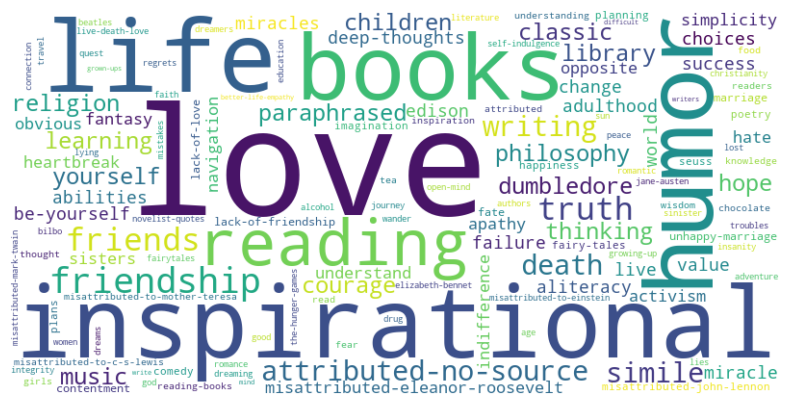

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#graficamente
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_frequencies)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

SCRAPING CON BEAUTIFULSOUP PAGINA DE WIKIPEDIA. He buscado en la Wikipedia Isabel I de Castilla. Con el scraping quiero encontrar la fecha y lugar de nacimiento, coronación y su muerte

In [5]:
from bs4 import BeautifulSoup
import requests
import json

r=requests.get('https://es.wikipedia.org/wiki/Isabel_I_de_Castilla')
soup= BeautifulSoup(r.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Isabel I de Castilla - Wikipedia, la enciclopedia libre
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pi

In [128]:
table= soup.find_all('div', {'class':"mw-content-ltr mw-parser-output"})
table

[<div class="mw-content-ltr mw-parser-output" dir="ltr" lang="es"><div class="rellink noprint hatnote">«Isabel la Católica» redirige aquí. Para otras acepciones, véase <a class="mw-disambig" href="/wiki/Isabel_la_Cat%C3%B3lica_(desambiguaci%C3%B3n)" title="Isabel la Católica (desambiguación)">Isabel la Católica (desambiguación)</a>.
 </div>
 <style data-mw-deduplicate="TemplateStyles:r149592226">.mw-parser-output .infobox .imagen{max-width:100%;margin:0 auto}.mw-parser-output .infobox .imagen img{max-width:100%;height:auto}body.skin-timeless .mw-parser-output .infobox .imagen a.image>img{max-width:100%!important;height:auto!important}</style><table class="infobox" style="width:22.7em; line-height: 1.4em; text-align:left; padding:.23em;"><tbody><tr><th class="cabecera persona" colspan="3" style="text-align:center;background-color:#EEEEEE;;color:inherit;">Isabel I de Castilla</th></tr><tr><td colspan="3" style="text-align:center;">
 <a href="/wiki/Anexo:Monarcas_de_Castilla" title="Anexo

Voy a buscar en el texto el nacimiento, coronación y muerte de Isabel la Catolica

In [140]:
table=soup.find_all('tr')

nacimiento = None
reinado = None
muerte = None

# Va sobre las filas de la tabla
for row in table:
    header_cell = row.find('th', {'scope': 'row', 'style': 'text-align:left;'})

    # Verificar si se encuentra la celda de encabezado y si contiene información relevante
    if header_cell:
        header_text = header_cell.get_text(strip=True)

        #  td busca la celda de datos despues de la celda de encabezado Nacimiento. que es la info que quiero
        data_cell = header_cell.find_next('td')

        # Si se encuentra la celda de datos, imprime su contenido
        if data_cell:
            data_text = data_cell.get_text(strip=True)
            
            if 'Nacimiento' in header_text:             #si está nacimiento en el encabezado, entonces pon el contenido de los datos como nacimiento
                nacimiento = data_text
            elif 'Coronación' in header_text:
                reinado = data_text
            elif 'Fallecimiento' in header_text:
                muerte = data_text

# Imprime los resultados
print(f"Nacimiento: {nacimiento}")
print(f"Coronación: {reinado}")
print(f"Fallecimiento: {muerte}")

Nacimiento: 22 de abril de 1451Madrigal de las Altas Torres,Corona de Castilla
Coronación: 13 de diciembre de 1474en laiglesia de San MigueldeSegovia
Fallecimiento: 26 de noviembre de 1504 (53 años)Medina del Campo,Corona de Castilla


Utilizando Selenium quiero obtener ahora la descendencia de Isabel la Catolica

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Firefox()

url='https://es.wikipedia.org/wiki/Isabel_I_de_Castilla'
driver.get(url)

try:
    # Encontrar el elemento por id
    descendencia_element = driver.find_element(By.ID, "Descendencia")

    # Obtener el texto del elemento
    descendencia_texto = descendencia_element.text

    # Imprimir el texto
    print(descendencia_texto)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Cerrar el navegador
    driver.quit()

Descendencia


In [18]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Firefox()

url='https://es.wikipedia.org/wiki/Isabel_I_de_Castilla'
driver.get(url)

try:
    # Buscar el elemento <span> con id 'Descendencia'
    descendencia_span = driver.find_element(By.ID, 'Descendencia')

    # Buscar el siguiente <ul> después del <span> con id 'Descendencia'
    ul_element = driver.find_element(By.XPATH, f'//span[@id="Descendencia"]/following::ul[1]')

    # Buscar y obtener el contenido de todas las etiquetas <li> dentro de <ul>
    li_elements = ul_element.find_elements(By.TAG_NAME, 'li')
    for li_element in li_elements:
        print(li_element.text)

except Exception as e:
    print(f"Error: {e}")

finally:
    # Cerrar el navegador
    driver.quit()


Isabel (1 o 2 de octubre de 1470-1498), princesa de Asturias (1476-1480; 1498), contrajo matrimonio con el infante Alfonso en 1490, pero este murió el año siguiente. Isabel inicialmente no quiso acceder a un nuevo matrimonio, pero en 1497 contrajo nuevas nupcias con el tíoi del fallecido, Manuel, que fue rey de Portugal con el nombre de Manuel I, el Afortunado.48 Fue reina de Portugal entre 1497 y 1498, y murió en el parto de su primer hijo Miguel de Paz.
Juan (30 de junio de 1478-1497), príncipe de Asturias (1480-1497). En 1497, contrajo matrimonio con Margarita de Austria (hija del emperador germánico Maximiliano I de Habsburgo); murió de tuberculosis poco después. Tuvo una hija póstuma que nació muerta. Margarita se fue de España y se encargó por un tiempo de su sobrino Carlos, futuro emperador Carlos V.
Juana I de Castilla (6 de noviembre de 1479-1555), princesa de Asturias (1502-1504), reina de Castilla (1504-1555) con el nombre de Juana I, y popularmente conocida como Juana «la L

Entro en la web de INVESTING, donde quiero obtener la información sobre la cotización diaria del IBEX

<!DOCTYPE html>
<html class="html" dir="ltr" lang="es">
 <head>
  <script>
   window.geo_country_state = 'ES_CT';
                window.geo_country = 'ES';
                window.geo_state = 'CT';
                function appendOneTrust() {
                    return new Promise((resolve, reject) => {
                        const script = document.createElement('script');
                        script.src = 'https://cookie-cdn.cookiepro.com/scripttemplates/otSDKStub.js';
                        script.dataset.domainScript = '265d5ac2-7d0c-4675-bf4d-421a61fb482e';
                        script.onload = resolve;
                        script.onerror = reject;
                        document.body.appendChild(script);
                    });
                }
  </script>
  <script>
   window.isGDPR = true;
                var OneTrustTCFStub=function(e){"use strict";var t=function(){var o=this;this.LOCATOR_NAME="__tcfapiLocator",this.win=window,this.init=function(){for(;o.win;){try{i
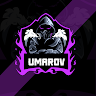
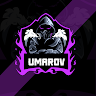

In [2]:
from bs4 import BeautifulSoup
import requests
import json


r=requests.get("https://es.investing.com/indices/spain-35-historical-data")
soup= BeautifulSoup(r.content,'html.parser')
print(soup.prettify())


Busco los datos del IBEX35

In [30]:
table = soup.find('table', attrs={'class': "w-full text-xs leading-4 overflow-x-auto freeze-column-w-1"})

table_headings = []


for tr in table.find_all('tr'):
    table_headings.append(tr.text)


for heading in table_headings:
    print(heading)

FechaÚltimo AperturaMáximo Mínimo Vol. % var.
05.01.202410.164,5010.128,5010.192,0010.061,20145,04M-0.18%
04.01.202410.182,4010.070,0010.190,8010.067,50110,89M+1.28%
03.01.202410.053,4010.183,2010.209,8010.038,10136,61M-1.26%
02.01.202410.182,1010.161,3010.287,9010.122,40137,05M+0.79%
29.12.202310.102,1010.092,2010.143,6010.090,90101,94M+0.16%
28.12.202310.086,2010.124,0010.136,3010.074,6095,15M-0.35%
27.12.202310.121,8010.096,1010.146,8010.077,90130,95M+0.10%
26.12.202310.111,9010.094,2010.143,1010.081,0091,97M0.00%
25.12.202310.111,9010.094,2010.143,1010.081,0091,97M0.00%
22.12.202310.111,9010.094,2010.143,1010.081,0091,97M+0.08%
21.12.202310.104,3010.068,6010.108,5010.063,3084,14M+0.03%
20.12.202310.101,0010.151,2010.158,2010.037,50146,80M-0.06%
19.12.202310.106,7010.054,1010.123,1010.023,80115,24M+0.52%
18.12.202310.054,9010.064,4010.125,8010.039,30134,02M-0.40%
15.12.202310.095,6010.194,9010.200,8010.050,70330,24M-0.75%
14.12.202310.171,7010.224,6010.257,8010.124,10255,85M+0.75%
1

Ahora quiero ver únicamente los datos de la fecha y el valor de cierre del IBEX35

In [ ]:
r=requests.get("https://es.investing.com/indices/spain-35-historical-data")
soup= BeautifulSoup(r.content,'html.parser')
print(soup.prettify())

In [5]:
r=requests.get("https://es.investing.com/indices/spain-35-historical-data")
soup= BeautifulSoup(r.content,'html.parser')

# Encuentra la tabla por clase
table = soup.find('table', class_='w-full text-xs leading-4 overflow-x-auto freeze-column-w-1')

# Imprime los encabezados de columna
print("Fecha\tCotización")

# Itera sobre las filas de la tabla
for row in table.find_all('tr')[1:]:  # Saltamos la primera fila porque contiene encabezados
    # Encuentra las celdas en la fila
    cells = row.find_all(['td', 'th'])

    # Obtiene los datos de Fecha y Cotización
    fecha = cells[0].find('time')['datetime']
    cotizacion = cells[1].text.strip()

    # Imprime los datos en dos columnas
    print(f"{fecha}\t{cotizacion}")

Fecha	Cotización
05.01.2024	10.164,50
04.01.2024	10.182,40
03.01.2024	10.053,40
02.01.2024	10.182,10
29.12.2023	10.102,10
28.12.2023	10.086,20
27.12.2023	10.121,80
26.12.2023	10.111,90
25.12.2023	10.111,90
22.12.2023	10.111,90
21.12.2023	10.104,30
20.12.2023	10.101,00
19.12.2023	10.106,70
18.12.2023	10.054,90
15.12.2023	10.095,60
14.12.2023	10.171,70
13.12.2023	10.096,10
12.12.2023	10.118,70
11.12.2023	10.198,00
08.12.2023	10.223,40
07.12.2023	10.146,00


Busco el volumen de operaciones del IBEX 35  por Selenium 

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Firefox()
url = ("https://es.investing.com/indices/spain-35-historical-data")
driver.get(url)

# Esperar hasta que la tabla esté presente
table = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, 'table.w-full.text-xs.leading-4.overflow-x-auto.freeze-column-w-1'))
)

# Esperar hasta que las filas estén presentes
rows = WebDriverWait(driver, 10).until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'table.w-full.text-xs.leading-4.overflow-x-auto.freeze-column-w-1 tbody tr'))
)
# Imprimir encabezados de columna
print("Fecha\t\Volumen")

# Iterar sobre las filas y encontrar los datos específicos en las celdas (td)
for row in rows:
    # Esperar hasta que el tiempo esté presente
    time_data = WebDriverWait(row, 10).until(
        EC.presence_of_element_located((By.XPATH, './/time[@datetime]'))
    )
    

    # Esperar hasta que la celda con dir='ltr' esté presente
    dir_ltr_data = WebDriverWait(row, 10).until(
        EC.presence_of_element_located((By.XPATH,'.//td[@data-test ="relative-most-active-vol"]'))
    )

    # Imprimir los datos que deseas
    #print(f"Fecha: {time_data.get_attribute('datetime')}, Contenido dir='ltr': {dir_ltr_data.text}")
    print(f"{time_data.get_attribute('datetime')}\t{dir_ltr_data.text}")

# Cerrar el navegador
driver.quit()

Fecha	\Volumen
05.01.2024	145,04M
04.01.2024	110,89M
03.01.2024	136,61M
02.01.2024	137,05M
29.12.2023	101,94M
28.12.2023	95,15M
27.12.2023	130,95M
26.12.2023	91,97M
25.12.2023	91,97M
22.12.2023	91,97M
21.12.2023	84,14M
20.12.2023	146,80M
19.12.2023	115,24M
18.12.2023	134,02M
15.12.2023	330,24M
14.12.2023	255,85M
13.12.2023	142,96M
12.12.2023	145,12M
11.12.2023	140,39M
08.12.2023	139,11M
07.12.2023	210,70M
